In [113]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf 
from tensorflow import keras 
import seaborn as sns 
import os 
from datetime import datetime 


In [114]:
dataset = pd.read_csv(r"C:\Users\Rohith\Downloads\Microsoft_Stock.csv") 
print(dataset.shape) 

(1511, 6)


In [115]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [116]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Date']= dataset['Date'].dt.date

In [117]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [118]:
dataset.sample(10)

,Date,Open,High,Low,Close,Volume
929,2018-12-07,108.38,109.45,104.30,104.82,45044937
923,2018-11-28,107.89,111.33,107.86,111.12,46788461
283,2016-05-16,50.80,51.96,50.75,51.83,20032017
532,2017-05-11,68.36,68.73,68.12,68.46,28789413
559,2017-06-20,70.82,70.87,69.87,69.91,21512231
1242,2020-03-09,151.00,157.75,150.00,150.62,70419274
382,2016-10-05,57.29,57.96,57.26,57.64,16726411
1328,2020-07-10,213.62,214.08,211.08,213.67,26177633
701,2018-01-11,88.13,88.13,87.24,88.08,17808877
1237,2020-03-02,165.31,172.92,162.31,172.79,71030810


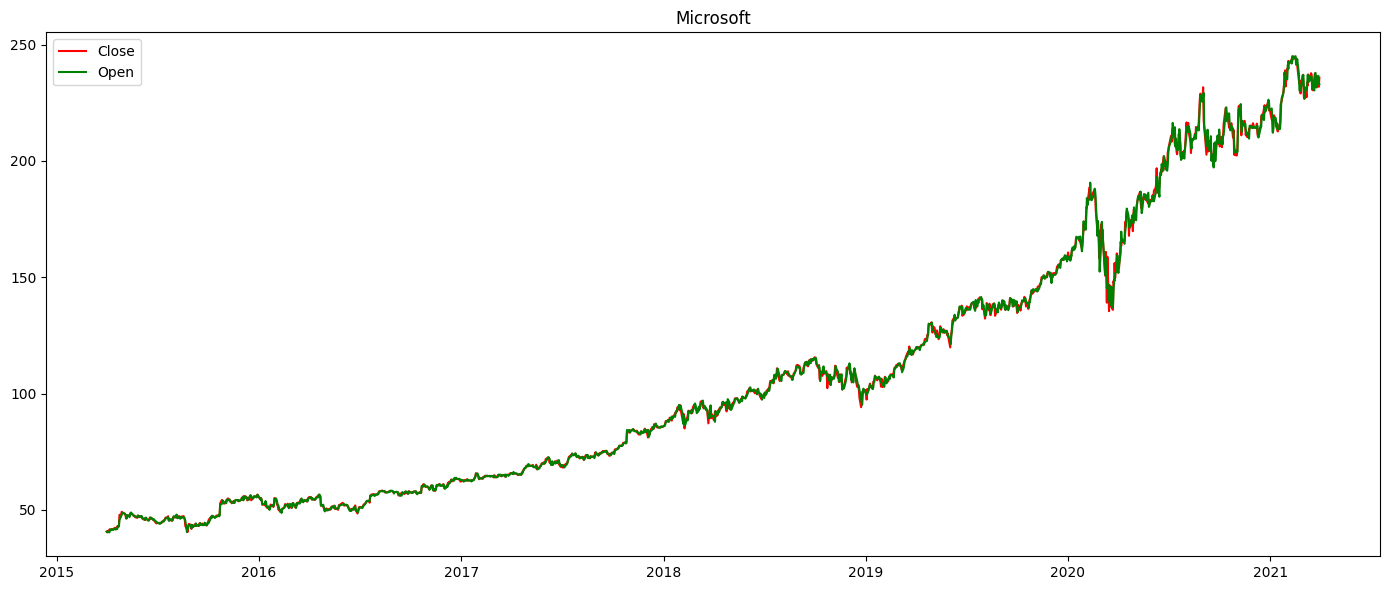

In [119]:
plt.figure(figsize=(14, 6))
plt.plot(dataset['Date'], dataset['Close'], c="r", label="Close", ) 
plt.plot(dataset['Date'], dataset['Open'], c="g", label="Open", ) 
plt.title("Microsoft") 
plt.legend() 
plt.tight_layout()

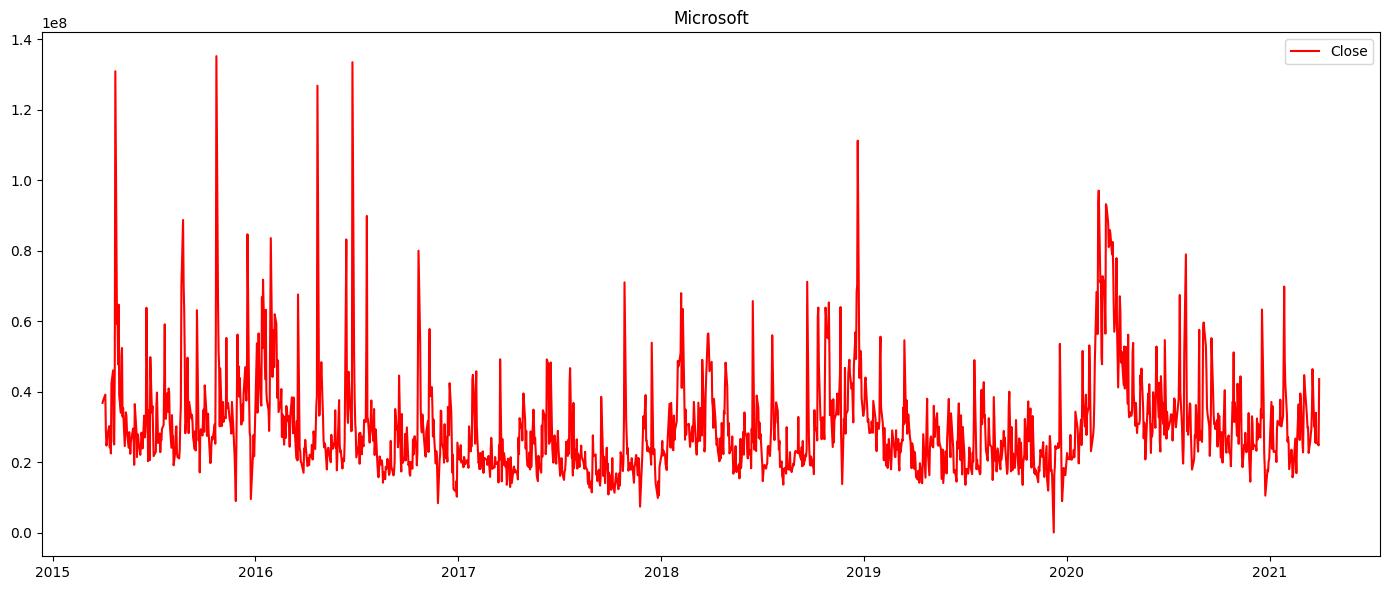

In [120]:
plt.figure(figsize=(14, 6))
plt.plot(dataset['Date'], dataset['Volume'], c="r", label="Close", ) 
plt.title("Microsoft") 
plt.legend() 
plt.tight_layout()

In [126]:
close_data = dataset['Close']
#close_data = close_dataset.values 
close_data = close_data.values.reshape(-1, 1) 
training_data_index = int(np.ceil(len(close_data) * 0.7))
training_data = close_data[:training_data_index]
print(training_data)

[[ 40.72]
 [ 40.29]
 [ 41.55]
 ...
 [132.1 ]
 [131.49]
 [132.32]]


In [127]:
from sklearn.preprocessing import MinMaxScaler 
  
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(close_data) 
  
train_data = scaled_data[0:int(training_data_index), :] 
# prepare feature and labels 
x_train = [] 
y_train = [] 
  
for i in range(60, len(train_data)): 
    x_train.append(train_data[i-60:i, 0]) 
    y_train.append(train_data[i, 0]) 
  
x_train, y_train = np.array(x_train), np.array(y_train) 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) 

In [128]:
model = keras.models.Sequential() 
model.add(keras.layers.LSTM(units=50, 
                            return_sequences=True, 
                            input_shape=(x_train.shape[1], 1))) 
model.add(keras.layers.LSTM(units=50)) 
model.add(keras.layers.Dense(32)) 
model.add(keras.layers.Dropout(0.5)) 
model.add(keras.layers.Dense(1)) 
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 60, 50)            10400     
                                                                 
 lstm_17 (LSTM)              (None, 50)                20200     
                                                                 
 dense_16 (Dense)            (None, 32)                1632      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 32,265
Trainable params: 32,265
Non-trainable params: 0
_________________________________________________________________


In [129]:
model.compile(optimizer='adam', 
              loss='mean_squared_error') 
history = model.fit(x_train, 
                    y_train, 
                    epochs=10)

Epoch 1/10
32/32 [==============================] - 7s 60ms/step - loss: 0.0054
Epoch 2/10
32/32 [==============================] - 2s 57ms/step - loss: 0.0019
Epoch 3/10
32/32 [==============================] - 2s 57ms/step - loss: 0.0016
Epoch 4/10
32/32 [==============================] - 2s 59ms/step - loss: 0.0017
Epoch 5/10
32/32 [==============================] - 2s 58ms/step - loss: 0.0016
Epoch 6/10
32/32 [==============================] - 2s 58ms/step - loss: 0.0017
Epoch 7/10
32/32 [==============================] - 2s 60ms/step - loss: 0.0014
Epoch 8/10
32/32 [==============================] - 2s 58ms/step - loss: 0.0012
Epoch 9/10
32/32 [==============================] - 2s 57ms/step - loss: 0.0013
Epoch 10/10
32/32 [==============================] - 2s 60ms/step - loss: 0.0011


In [130]:
test_data = close_data[training_data_index:]
inputs = close_data[len(close_data) - len(test_data) - 60:]
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)
x_test = [] 
#y_test = dataset.iloc[training_data:, :] 
for i in range(60,inputs.shape[0]):
        x_test.append(inputs[i-60:i,0])
  
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
closing_price = model.predict(x_test)
closing_price = scaler.inverse_transform(closing_price)
RMS=np.sqrt(np.mean(np.power((test_data-closing_price),2)))
#y_test = pd.to_numeric(y_test, errors='coerce')
#y_test = y_test.to_numpy()

print("RMS:",RMS)
print("MSE:",RMS**2)
  


15/15 [==============================] - 1s 25ms/step
RMS: 6.741455384188408
MSE: 45.447220697002884


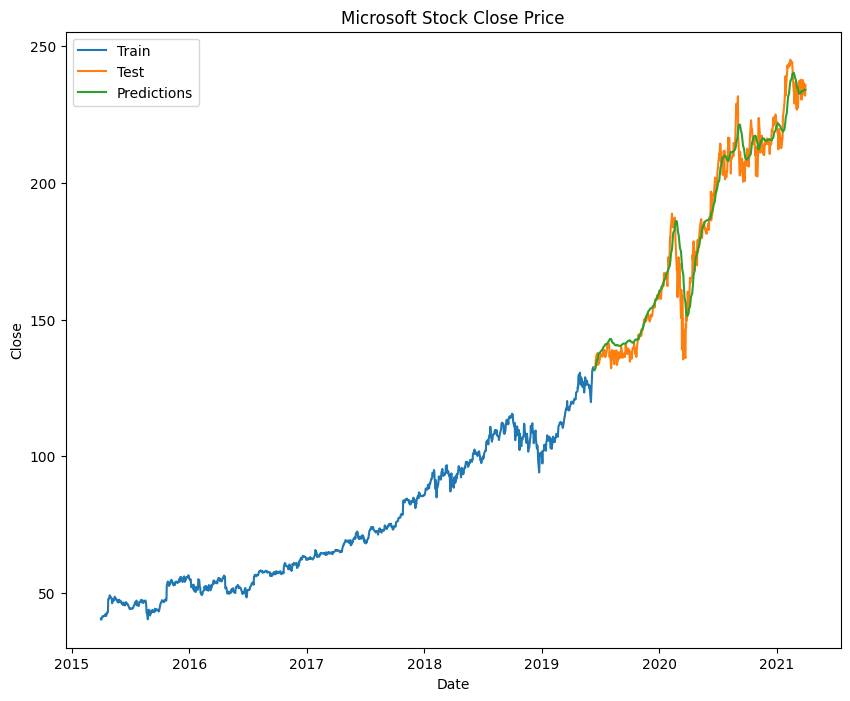

In [136]:
train = dataset[:training_data_index] 
test = dataset[training_data_index:] 
test_data_df = pd.DataFrame(test_data, columns=['Close'])
test_data_df['Predictions'] = closing_price
plt.figure(figsize=(10, 8)) 
plt.plot(train['Date'], train['Close']) 
plt.plot(test['Date'], test_data_df[['Close', 'Predictions']]) 
plt.title('Microsoft Stock Close Price') 
plt.xlabel('Date') 
plt.ylabel("Close") 
plt.legend(['Train', 'Test', 'Predictions']) 